# [EX18] 다양한 OCR모델 비교하기

#### * 목차
1. 검증용 데이터셋 준비  
2. 각 모델 테스트 진행     
 1) Google OCR API     
 2) keras-ocr  
 3) Tesseract     
3. 테스트 결과 정리         
 1) 테스트 이미지        
 2) 테스트 결과      
4. 결과 분석과 결론 제시    

## 1. 검증용 데이터셋 준비

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as img

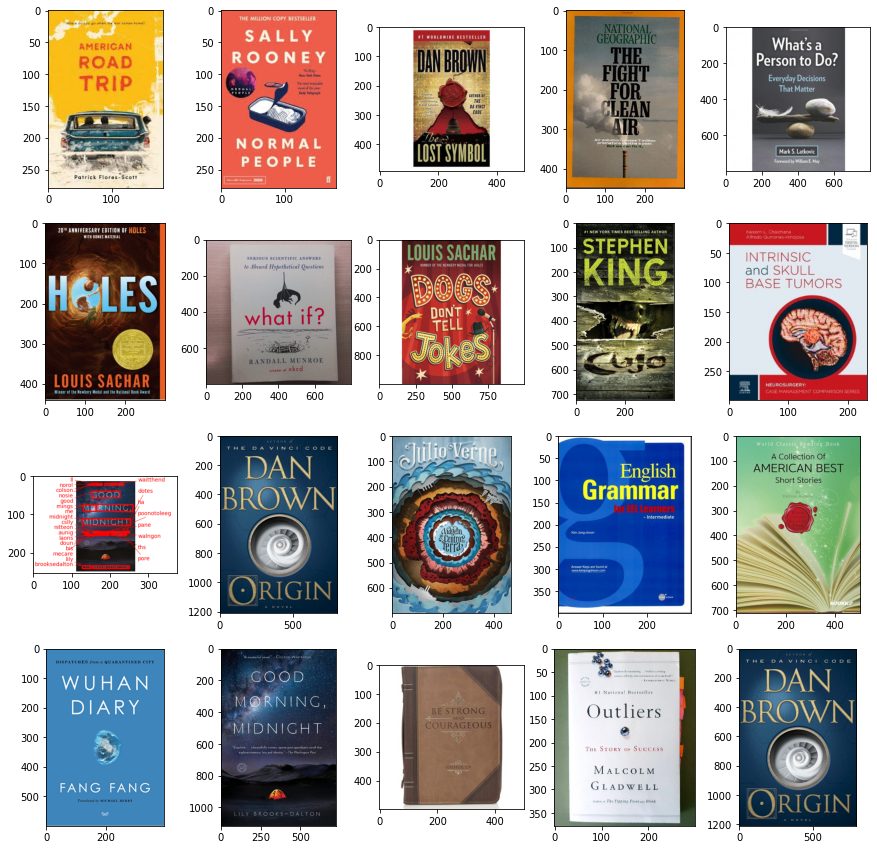

In [2]:
dir_path = os.getenv('HOME')+'/aiffel/ocr_python/imgs/'
file_list = os.listdir(dir_path)

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(15,15))

for i, ax in enumerate(axes.flatten()):
    image = img.imread(dir_path + file_list[i])
    ax.imshow(image)

plt.show()
fig.tight_layout()

## 2. 각 모델 테스트 진행

### 1) Google OCR API

In [3]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [4]:
#!ls -l $GOOGLE_APPLICATION_CREDENTIALS
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

In [5]:
# 위에서 정의한 OCR API 이용 함수를 호출
for i in range(20):
    img_path = dir_path + file_list[i]
    detect_text(img_path)

Texts:

"we do a rees hemet
AMERICAN
ROAD
TRIP
Patrick Flores -Scott
"

"we"

"do"

"a"

"rees"

"hemet"

"AMERICAN"

"ROAD"

"TRIP"

"Patrick"

"Flores"

"-Scott"
bounds: (111,257),(139,257),(139,264),(111,264)
Texts:

"THE MILLION COPY BESTSELLER
SALLY
ROONEY
Dal t
NORMAL
PEOPLE
"

"THE"

"MILLION"

"COPY"

"BESTSELLER"

"SALLY"

"ROONEY"

"Dal"

"t"

"NORMAL"

"PEOPLE"
bounds: (33,229),(147,230),(147,246),(33,245)
Texts:

"#1 WORLDWIDE BESTSELLER
DAN BROWN
"Amazing....
Another
mind-blowing
Robert Langdon
story.
New York
Times
AUTHOR OF
THE
DA VINCI
CODE
The
LOST SYMBOL
"

"#1"

"WORLDWIDE"

"BESTSELLER"

"DAN"

"BROWN"

""Amazing...."

"Another"

"mind-blowing"

"Robert"

"Langdon"

"story."

"New"

"York"

"Times"

"AUTHOR"

"OF"

"THE"

"DA"

"VINCI"

"CODE"

"The"

"LOST"

"SYMBOL"
bounds: (222,394),(367,394),(367,467),(222,467)
Texts:

"NATIONAL
GEOGRAPHIC
THE
FIGHT
FOR
CLEAN
AIR
Air pollution causes 7 mililon
premature deaths a year.
But we can fix it.
"

"NATIONAL"

"GEOGRAPHI

### 2) keras-ocr

In [6]:
import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [7]:
# 테스트에 사용할 이미지 url을 모아 봅니다. 추가로 더 모아볼 수도 있습니다. 
image_urls = [
    'https://mblogthumb-phinf.pstatic.net/MjAxNzEwMzBfMTI2/MDAxNTA5MzQ5NjU2MTYy.N-DmgqzphModGSgyl4KLJQEkAIS4Q2o8Fq_1kxIv_AYg.O19xj8AuQHIQQEKewAET8ZaoxZOLdpLaSxxKG7ejk9cg.JPEG.moonhak91/%ED%95%B4%EC%99%B8%EC%B1%85%ED%91%9C%EC%A7%80.jpg?type=w800',
    'https://cdn.iworldtoday.com/news/thumbnail/202105/401478_201600_115_v150.jpg',
    'https://shop4.daumcdn.net/thumb/R500x500/?fname=http%3A%2F%2Fshop4.daumcdn.net%2Fshophow%2Fp%2FO9592298703.jpg%3Fut%3D20210315210313',
    'https://thumbnail9.coupangcdn.com/thumbnails/remote/492x492ex/image/retail/images/2017/08/02/14/7/acbbfe3e-1e34-4114-a7a1-c2f5713b5107.jpg',
    'http://cdn.011st.com/11dims/resize/300x300/quality/75/11src/pd/21/1/2/0/9/5/3/wRMRG/3304120953_B.jpg',
    'https://article-imgs.scribdassets.com/pz1fxtbi88atrxs/images/fileA67JFYWN.jpg'
]

images = [ keras_ocr.tools.read(url) for url in image_urls]
prediction_groups = [pipeline.recognize([url]) for url in image_urls]

/opt/conda/lib/python3.7/site-packages/keras_ocr/tools.py:166: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  horizontalalignment='right' if side == 'left' else 'left')


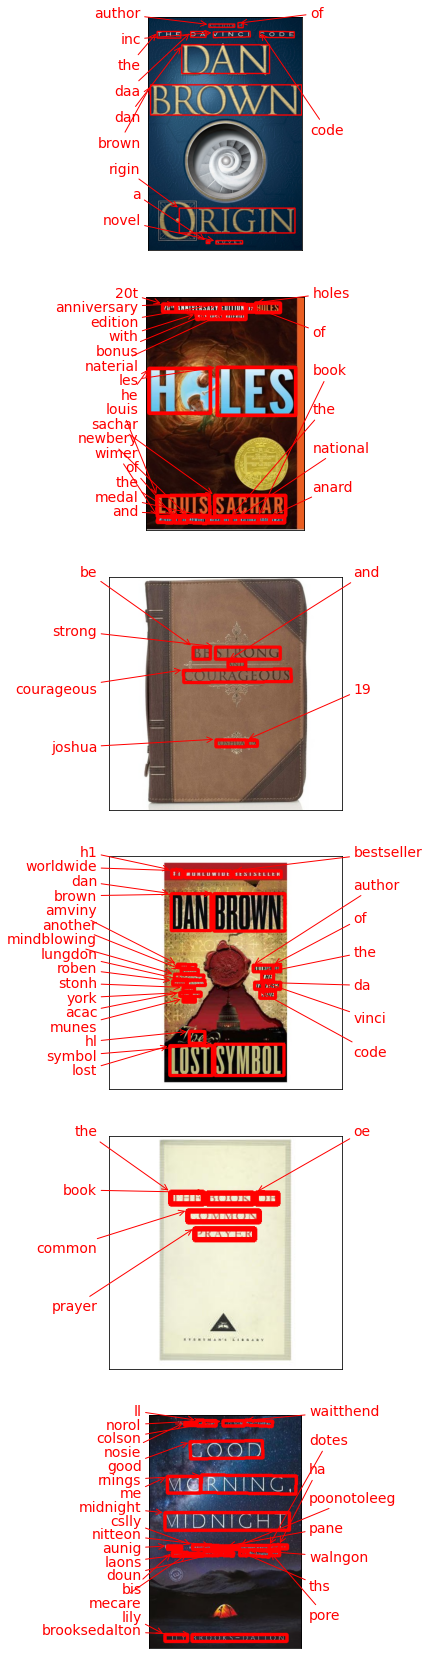

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(30, 30))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### 3) Tesseract

In [9]:
# 테서랙트로 문자 검출하고 이미지 자르기 (detection)
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./images/sample.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/work'
img_file_path = os.getenv('HOME')+'/aiffel/ocr_python/data/15.jpg'

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/work/0000.png
/aiffel/aiffel/ocr_python/work/0001.png
/aiffel/aiffel/ocr_python/work/0002.png
/aiffel/aiffel/ocr_python/work/0003.png
/aiffel/aiffel/ocr_python/work/0004.png
/aiffel/aiffel/ocr_python/work/0005.png
/aiffel/aiffel/ocr_python/work/0006.png
/aiffel/aiffel/ocr_python/work/0007.png
/aiffel/aiffel/ocr_python/work/0008.png
/aiffel/aiffel/ocr_python/work/0009.png
/aiffel/aiffel/ocr_python/work/0010.png
/aiffel/aiffel/ocr_python/work/0011.png
/aiffel/aiffel/ocr_python/work/0012.png
/aiffel/aiffel/ocr_python/work/0013.png
/aiffel/aiffel/ocr_python/work/0014.png
/aiffel/aiffel/ocr_python/work/0015.png
/aiffel/aiffel/ocr_python/work/0016.png
/aiffel/aiffel/ocr_python/work/0017.png
/aiffel/aiffel/ocr_python/work/0018.png
/aiffel/aiffel/ocr_python/work/0019.png
/aiffel/aiffel/ocr_python/work/0020.png
/aiffel/aiffel/ocr_python/work/0021.png
/aiffel/aiffel/ocr_python/work/0022.png
/aiffel/aiffel/ocr_python/work/0023.png
/aiffel/aiffel/ocr_python/work/0024.png


In [10]:
# 테서랙트로 잘린 이미지에서 단어 인식하기
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

ee

7 ers

ee iy

epee

im

—COLson

VWHITEH

ae

Pa '

~ Exquisi

7 ee

eee Dt

7hatlh

y written, sp

sie

See

pocaly

ptic nove

ae

Wesel laceut Tuleh)

CET:

did

aS 8

sanity if FG Ve

ashing

ton Fost’

‘)

hl

(aoe trae = SS

one

— |)

(pee

| Ses SO ps

Done


## 3. 테스트 결과 정리

### 1) 테스트 이미지

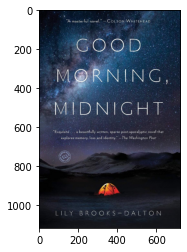

In [11]:
image_path = os.getenv('HOME')+'/aiffel/ocr_python/data/15.jpg'
img = img.imread(image_path)
plt.imshow(img)
plt.show()

### 2) 테스트 결과

#### Google OCR API
""A masterful novel." -COLSON WHITEHEAD         
GOOD    
MORNING,     
MIDNIGHT       
"Exquisite.. . a beautifully written, sparse post-apocalyptic novel that        
explores memory, loss and identity." –The Washington Post       
HOUS     
ANDON     
P's C     
LILY BRO OKS - DALTON        
"     

#### keras-ocr

![keras-ocr](test.jpg)

#### Tesseract
ee    
7 ers      
ee iy 
epee    
im  
—COLson    
VWHITEH    
ae    
Pa '   
~ Exquisi   
7 ee   
eee Dt  
7hatlh    
y written, sp   
sie    
See    
pocaly   
ptic nove   
ae       
Wesel laceut Tuleh)   

CET:  
did   
aS 8    
sanity if FG Ve    
ashing   
ton Fost’     
‘)    
hl    
(aoe trae = SS   
one  
— |)    
(pee  
| Ses SO ps   
    
Done   

## 4. 결과 분석과 결론 제시

#### 1) 서비스의 목적
책 표지 텍스트 인식 서비스

#### 2) OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시
평가 기준 : 책 표지의 작은 글씨들을 정확하게 인식하고 출력 할 수 있어야 함.

#### 3) 각 OCR 모델 결과
Google OCR API : 휘어있는 텍스트를 제외한 모든 텍스트를 정확히 인식하고 출력함.         
keras-ocr : 작은 텍스트를 인식하였으나, 틀리게 출력함. 휘어있는 텍스트는 아예 인식하지 못하였음.         
Tesseract : 대부분의 텍스트를 제대로 인식하지 못하였음.           
#### 4) 가장 나은 대안의 모델을 선정
책 표지에는 책 내용을 설명하기 위한 작은 글씨들이 많이 사용됨.    
다른 ORC 모델에 비해, 모든 텍스트를 정확하게 인식하고 출력한 Google OCR API 모델을 을 선정함.